# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='whitegrid')

## Data Gathering


In [2]:
twitter_archive_enhanced = pd.read_csv('./twitter-archive-enhanced.csv')
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:

# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)
# with open('image_predictions.tsv', mode='wb') as file:
#     file.write(response.content)

In [4]:
# read_csv
image_predictions = pd.read_csv('./image_predictions.tsv',sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet_json.txt', mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Read downloaded txt file line by line into a pandas DataFrame
tweet_list = []
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_list.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})


# creating a dataframe
tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.head(3)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


## Assessing Data



In [7]:
twitter_archive_enhanced.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671504605...,11,10,Charlie,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [8]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
sum(twitter_archive_enhanced.duplicated())

0

In [10]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1314,754856583969079297,https://pbs.twimg.com/media/CnnKCKNWgAAcOB8.jpg,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
sum(tweet_json.duplicated())

0

### Quality issues
1. completeness issues for example missed values in ng columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.
2. consistency issues in the data NaN and None represents the same thing
3. they are some tweets which are retweets which do not form part of this analysis
4. validity issue- rating denominator is greater than 10 in sum instances
5. validity issue-misrepresentation of timestamp column +0000 needs to be removed.
6.  there are tweet_ids in twitter_archive_enhance csv which are not found in twitter API data, they give errors, these have to be removed.
7.  dog names misrecorded 
8. some tweets are not for dog names, they're tweet about for exmple happy birthday tweet. They need to be removed


### Tidiness issues
1. variable has multiple columns- dog stages should be in one column-puppo, doggo etc
2. same observational unit-twitter_archive_enhanced dataframe, image_predictions dataframe and twitter_api dataframe should fall under one dataframe 


## Cleaning Data


In [14]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive_enhanced.copy()
image_predictions_copy = image_predictions.copy()
twitter_json_copy = tweet_json.copy()

## 1)Tidness issues

### Issue #1:  variable has multiple columns- dog stages should be in one column-puppo, doggo etc



- NB by solving issue 1 I solve issue one in the process

#### Define:

- remove doggo,floofer,pupper,puppo columns and melt them into one dog_stage column

#### Code

##### twitter_archive_copy dataset

In [15]:
# creating separate datasets
twitter_doggo = twitter_archive_copy[twitter_archive_copy.doggo == 'doggo'] 
twitter_floofer = twitter_archive_copy[twitter_archive_copy.floofer == 'floofer']
twitter_pupper = twitter_archive_copy[twitter_archive_copy.pupper == 'pupper']
twitter_puppo = twitter_archive_copy[twitter_archive_copy.puppo == 'puppo']


# droping columns and renaming a column
twitter_puppo.drop(labels=['floofer', 'doggo', 'pupper'], inplace=True, axis=1)
twitter_puppo.rename(columns={'puppo':'dog_age'}, inplace=True)

twitter_doggo.drop(labels=['floofer', 'puppo', 'pupper'], inplace=True, axis=1)
twitter_doggo.rename(columns={'doggo':'dog_age'}, inplace=True)

twitter_floofer.drop(labels=['puppo', 'doggo', 'pupper'], inplace=True, axis=1)
twitter_floofer.rename(columns={'floofer':'dog_age'}, inplace=True)

twitter_pupper.drop(labels=['floofer', 'doggo', 'puppo'], inplace=True, axis=1)
twitter_pupper.rename(columns={'pupper':'dog_age'}, inplace=True)

# concatenating a all the dataframes
list_df = [twitter_puppo, twitter_doggo, twitter_floofer, twitter_pupper]
twitter_clean = pd.concat(list_df)


#### test

In [16]:
twitter_clean.shape

(394, 14)

### Issue #2:   Same observational unit-twitter_archive_enhanced dataframe and twitter_api dataframe should fall under one dataframe


### Issue #4: there are tweet_ids in twitter_archive_enhance csv which are not found in twitter API data, they give errors, these have to be removed.

- NB: by merging the two datasets using how='inner' we would have solved issue 2 and 3 at the same time

#### Define

- merge twitter_archive dataframe and twitter_api

#### Code

In [17]:
# removing all rows which does not have images
twitter_clean_merge = twitter_clean.merge(image_predictions_copy, on='tweet_id', how='inner')

In [18]:
#removing all rows which are deleted from the api
twitter_clean_merge = twitter_clean_merge.merge(twitter_json_copy,on='tweet_id',how='inner')


#### Test

In [19]:
twitter_clean_merge.shape

(333, 27)

## 2) Quality Issues

### Issue #4: removing retweets

#### define

- remove all retweets


#### code

In [20]:
twitter_clean_merge.shape

(333, 27)

In [21]:
twitter_clean_merge = twitter_clean_merge[~twitter_clean_merge.text.str.startswith('RT')]

#### test

In [22]:
twitter_clean_merge.shape

(317, 27)

### Issue #5: completeness issues for example missed values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls.

### Issue #6: remove columns that do not form part of the analysis

- Nb by solving issue 7 I have already solved issue 6

#### define

- remove columns not part of the analysis

#### code

In [23]:
columns_ = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
            'in_reply_to_status_id', 'in_reply_to_user_id']

twitter_clean_merge.drop(columns_, inplace=True, axis=1)
    

#### test

In [24]:
twitter_clean_merge.shape

(317, 22)

### Issue 7: column data types have been misrepresented-timestamp

#### define

- change misrepresented column data types

#### code

In [25]:
# Remove +0000
twitter_clean_merge.timestamp = twitter_clean_merge.timestamp.str[:-6]
# Convert to datetime
twitter_clean_merge.timestamp = pd.to_datetime(twitter_clean_merge.timestamp)


#### test

In [26]:
twitter_clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 332
Data columns (total 22 columns):
tweet_id              317 non-null int64
timestamp             317 non-null datetime64[ns]
source                317 non-null object
text                  317 non-null object
expanded_urls         317 non-null object
rating_numerator      317 non-null int64
rating_denominator    317 non-null int64
name                  317 non-null object
dog_age               317 non-null object
jpg_url               317 non-null object
img_num               317 non-null int64
p1                    317 non-null object
p1_conf               317 non-null float64
p1_dog                317 non-null bool
p2                    317 non-null object
p2_conf               317 non-null float64
p2_dog                317 non-null bool
p3                    317 non-null object
p3_conf               317 non-null float64
p3_dog                317 non-null bool
retweet_count         317 non-null int64
favorite_coun

### Issue 8: validity issue- rating denominator is greater than 10 in sum instances

#### define

- remove change all rows that have rating denominator greater than 10

#### code

In [27]:
def check_value(x):
    if x < 10:
        return 10
    elif x > 10:
        return 10
    else:
        return x
        

In [28]:

# removing values less than 10 and greater than 10
twitter_clean_merge.rating_denominator = twitter_clean_merge.rating_denominator.apply(
    lambda x: check_value(x))   


#### test

In [29]:
twitter_clean_merge.rating_denominator.value_counts()

10    317
Name: rating_denominator, dtype: int64

### Issue #9 : names that have been misrecorded - dogs being given a name like 'a'

#### define

- manually verify text column and name column for all dog names 'a'

#### code

In [30]:
twitter_clean_merge.reset_index(inplace=True,drop=True)

In [31]:
pd.set_option('display.max_rows', twitter_clean_merge.shape[0])

In [32]:
twitter_clean_merge.query('name == "None" or name == "a" ')[['text', 'name']]

,text,name
0,Here's a puppo that seems to be on the fence a...,None
5,Sorry for the lack of posts today. I came home...,None
6,Here's a puppo participating in the #ScienceMa...,None
7,Here's a puppo participating in the #ScienceMa...,None
8,Here's a very loving and accepting puppo. Appe...,None
10,Here's a super supportive puppo participating ...,None
17,I want to finally rate this iconic puppo who t...,None
18,When ur older siblings get to play in the deep...,None
19,Hopefully this puppo on a swing will help get ...,None
26,Here's a very large dog. He has a date later. ...,None


In [33]:
twitter_clean_merge.iloc[277,:][['text', 'name', 'dog_age']]

text       Watch out Airbud. This pupper is also good at ...
name                                                    None
dog_age                                               pupper
Name: 277, dtype: object

In [34]:
#replacing all dog names 'a' with their respective correct names
twitter_clean_merge.iloc[60, twitter_clean_merge.columns.get_loc('name')] = 'Dexter'
twitter_clean_merge.iloc[61, twitter_clean_merge.columns.get_loc('name')] = 'Burke'
twitter_clean_merge.iloc[109, twitter_clean_merge.columns.get_loc('name')] = 'Atlas'
twitter_clean_merge.iloc[116, twitter_clean_merge.columns.get_loc('name')] = 'None'
twitter_clean_merge.iloc[122, twitter_clean_merge.columns.get_loc('name')] = 'Cooper'
twitter_clean_merge.iloc[131, twitter_clean_merge.columns.get_loc('name')] = 'Bell'
twitter_clean_merge.iloc[160, twitter_clean_merge.columns.get_loc('name')] = 'None'
twitter_clean_merge.iloc[192, twitter_clean_merge.columns.get_loc('name')] = 'None'
twitter_clean_merge.iloc[200, twitter_clean_merge.columns.get_loc('name')] = 'None'
twitter_clean_merge.iloc[257, twitter_clean_merge.columns.get_loc('name')] = 'Toby'
twitter_clean_merge.iloc[277, twitter_clean_merge.columns.get_loc('name')] = 'Airbud'

#### test

In [35]:
twitter_clean_merge.query('name == "a" ')[['text', 'name']]

,text,name


### Issue #10: consistency issues in the data NaN and None represents the same thing

- replace 'None' with np.nan

#### code

In [36]:
twitter_clean_merge.replace('None', np.nan,inplace=True)

#### test

In [37]:
twitter_clean_merge.query('name == "None" ')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_age,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count






## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [38]:
twitter_clean_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [39]:
# reading ds
twitter_archive_master = pd.read_csv('./twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_age,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,8538,38818
1,889531135344209921,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2321,15359
2,878776093423087618,2017-06-25 00:45:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,...,0.734684,True,whippet,0.150487,True,Ibizan_hound,0.039725,True,4319,19763
3,874012996292530176,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,puppo,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,...,0.806674,True,Pembroke,0.116622,True,kelpie,0.049182,True,11007,35501
4,867421006826221569,2017-05-24 16:44:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,puppo,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,...,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True,2697,16755


### Insights:
1. Is there a correlation between retweet_counts and favorite_counts?

2. does dog_stage matter in giving higher or lower ratings?

3. which dog name has the most popular favorite_counts?

### Visualization

#### 1. Is there a correlation between retweet_counts and favorite_counts?

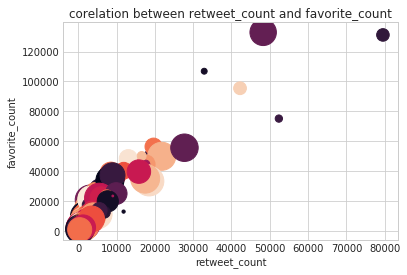

In [40]:
# for reproducibility
np.random.seed(19680801)

x = twitter_archive_master.retweet_count
y = twitter_archive_master.favorite_count
size = twitter_archive_master.shape[0]

# adding colors
colors = np.random.rand(size)
area = (30 * np.random.rand(size))**2  # 0 to 15 point radii
plt.scatter(x, y, s=area,c=colors, alpha=1.5)
plt.title('corelation between retweet_count and favorite_count')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()

- we can note that there is a positive correlation between favorite_count and retweet_count. With all other factors that are likely to affect retweet count set aside, we can safely say that a picture of a dog liked as favorite is most likely to be retweeted.

#### 2. does dog_stage matter in giving higher or lower ratings?


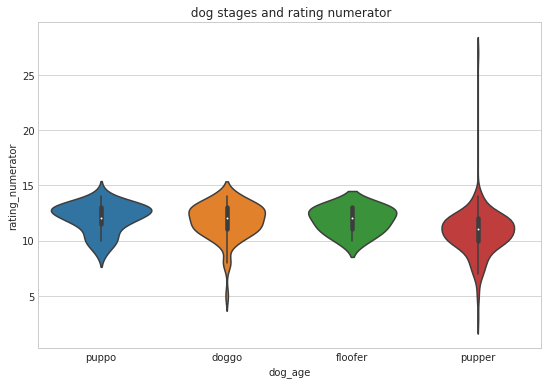

In [41]:
ratings = twitter_archive_master[['rating_numerator', 'dog_age']]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

t =' dog stages and rating numerator'
# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=ratings,x = 'dog_age', y ='rating_numerator').set_title(t);


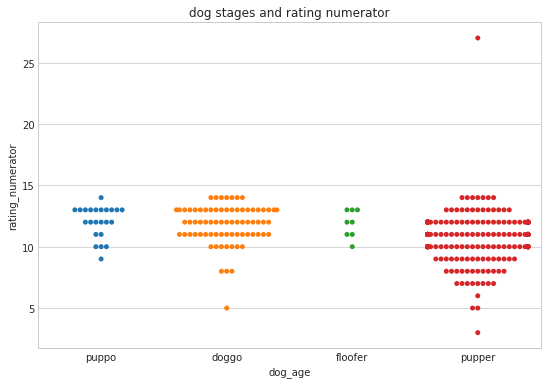

In [42]:
# using swarmplot
f, ax = plt.subplots(figsize=(9, 6))
title_ = 'dog stages and rating numerator'
sns.swarmplot(data=ratings, x='dog_age', y='rating_numerator').set_title(title_);

- although we can see much outlier rating in pupper dog age, we can safely say there is not much of a relationship between the dog's age and its rating

#### 3. which dog name has the most popular favorite_counts?

In [48]:
#create a dataframe of name and favorite_counts sort in ascending order
popular = twitter_archive_master[['name', 'favorite_count']].sort_values(by='favorite_count', ascending=False)


In [44]:
# take on only the top ten values
popular = popular[0:10]


In [49]:
popular.reset_index(inplace=True, drop=True)

In [46]:
popular.dropna()

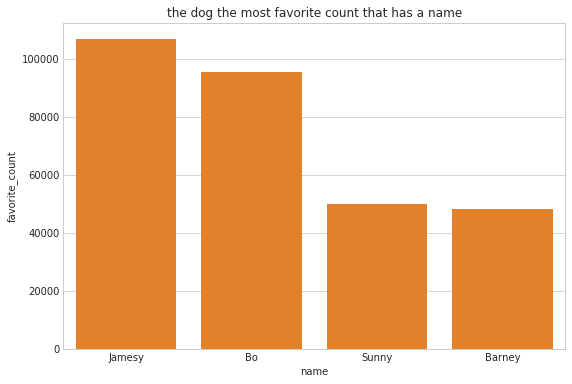

In [47]:
#plotting a
f, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x=popular.name, y=popular.favorite_count,color=sns.color_palette()[1] ).set_title('the dog the most favorite count that has a name');


- Apart from other dogs that had the most favorite counts but didn't have names we can see that Jamesy was the dog with a name with the most favorite counts.